In [2]:
pip install librosa

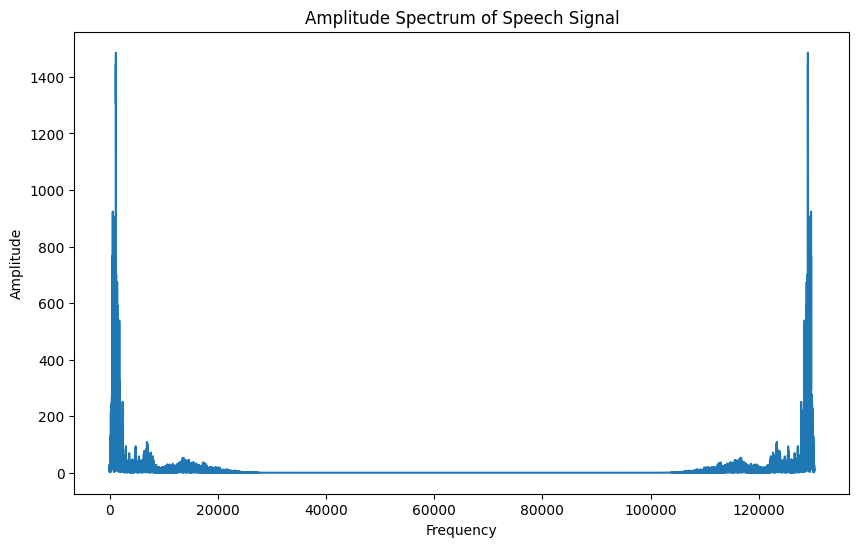

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal

# Load the speech signal data using librosa
speech_signal, sample_rate = librosa.load("/content/AI_IN_SP_AUDIO_RECORDING.wav", sr=None)

# A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain
spectrum = np.fft.fft(speech_signal)
amplitude_spectrum = np.abs(spectrum)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()



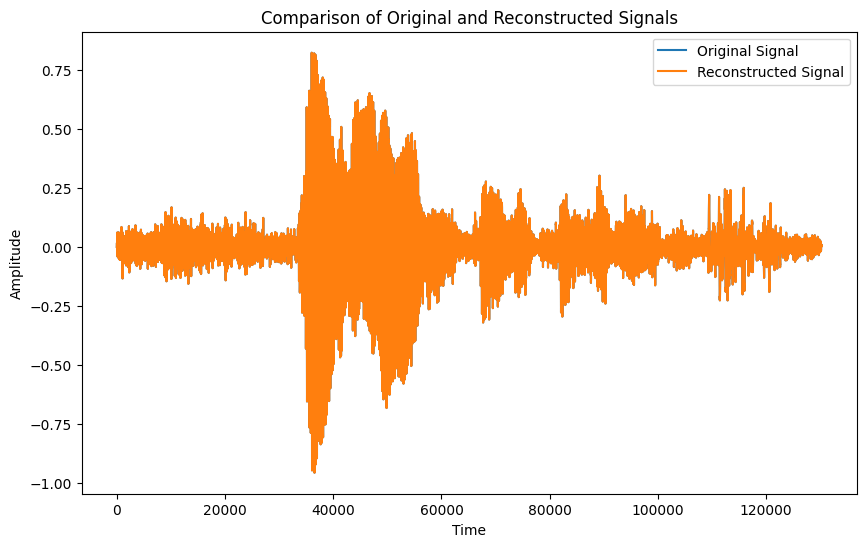

In [9]:

# A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum
reconstructed_signal = np.fft.ifft(spectrum)

# Compare the reconstructed signal with the original signal
plt.figure(figsize=(10, 6))
plt.plot(speech_signal, label='Original Signal')
plt.plot(np.real(reconstructed_signal), label='Reconstructed Signal')
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

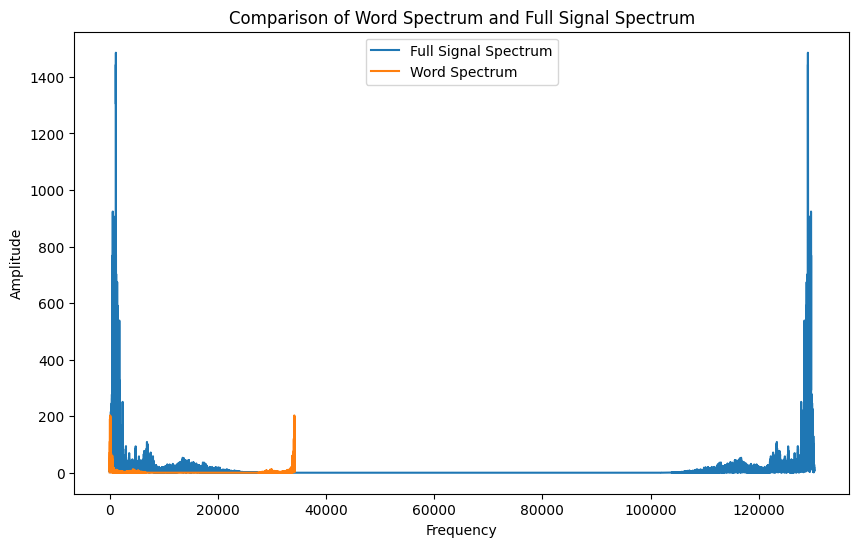

In [5]:
# A3. Perform spectral analysis of a word present in the recorded speech
# Assuming you have the start and end times (in seconds) of the word
word_start_time = 2.0  # Replace with the actual start time of the word
word_end_time = 4.0    # Replace with the actual end time of the word

# Convert times to sample indices
word_start = int(word_start_time * sample_rate)
word_end = int(word_end_time * sample_rate)

word_signal = speech_signal[word_start:word_end]
word_spectrum = np.fft.fft(word_signal)
word_amplitude_spectrum = np.abs(word_spectrum)

# Plot the spectrum of the word and the full signal
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum, label='Full Signal Spectrum')
plt.plot(word_amplitude_spectrum, label='Word Spectrum')
plt.title('Comparison of Word Spectrum and Full Signal Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [12]:
!pip install pydub


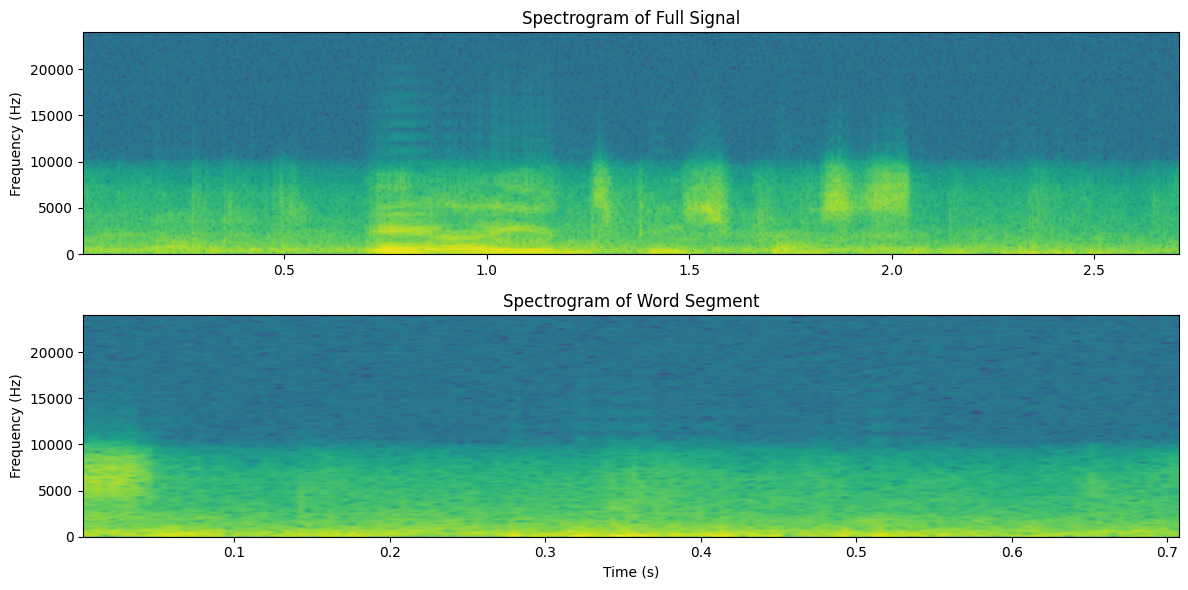

In [14]:
# A3. Perform spectral analysis of a word present in the recorded speech
import numpy as np
import matplotlib.pyplot as plt
import pydub
from scipy.signal import spectrogram

# Load your audio file (replace 'full_audio.mp3' with your actual file)
def read_audio(file_path):
    a = pydub.AudioSegment.from_mp3(file_path)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    return a.frame_rate, y

# Assuming you have an audio file named 'full_audio.mp3'
sampling_rate, full_signal = read_audio('AI_IN_SP_AUDIO_RECORDING.wav')

# Identify the word segment (replace with actual start and end times)
start_time = 2.0  # Start time in seconds
end_time = 3.5    # End time in seconds

word_segment = full_signal[int(start_time * sampling_rate):int(end_time * sampling_rate)]


# Compute the spectrogram for the full signal
f_full, t_full, Sxx_full = spectrogram(full_signal, fs=sampling_rate)


# Compute the spectrogram for the word segment
f_word, t_word, Sxx_word = spectrogram(word_segment, fs=sampling_rate)

# Plot the spectrograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_full, f_full, 10 * np.log10(Sxx_full), shading='gouraud')
plt.title("Spectrogram of Full Signal")
plt.ylabel("Frequency (Hz)")

plt.subplot(2, 1, 2)
plt.pcolormesh(t_word, f_word, 10 * np.log10(Sxx_word), shading='gouraud')
plt.title("Spectrogram of Word Segment")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

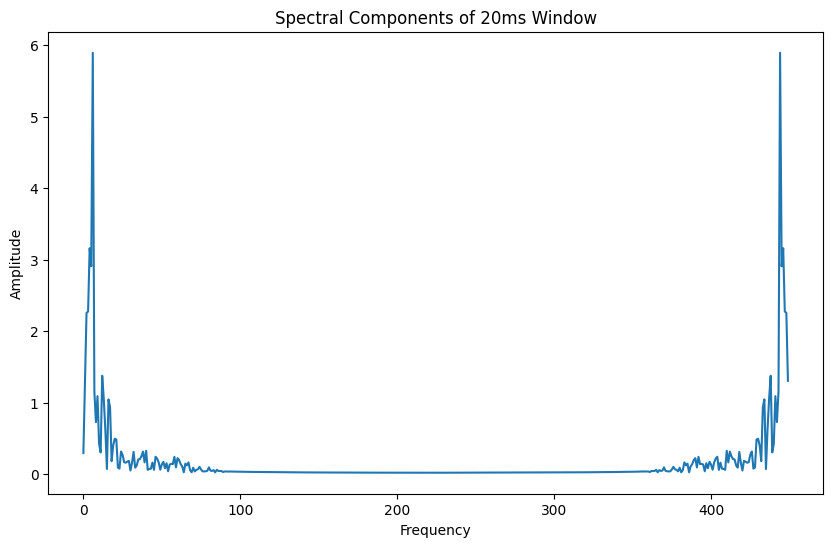

In [20]:
# A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz and analyze spectral components
sample_rate = 22500  # Assuming a sample rate of 22.5 KHz
window_size = int(0.02 * sample_rate)  # 20 mili-second window
window = speech_signal[:window_size]
window_spectrum = np.fft.fft(window)
window_amplitude_spectrum = np.abs(window_spectrum)

# Plot the spectral components of the window
plt.figure(figsize=(10, 6))
plt.plot(window_amplitude_spectrum)
plt.title('Spectral Components of 20ms Window')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

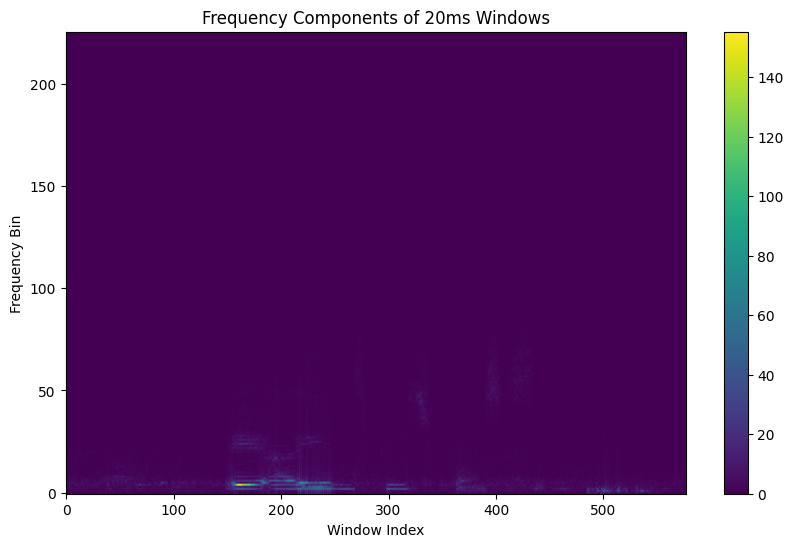

In [7]:
# A5. Break the speech signal into 20ms windows and evaluate frequency components
window_size = int(0.02 * sample_rate)  # 20 mili-second window
window_step = window_size // 2  # 50% overlap
num_windows = (len(speech_signal) - window_size) // window_step + 1
frequency_components = []

for i in range(num_windows):
    start = i * window_step
    end = start + window_size
    window = speech_signal[start:end]
    window_spectrum = np.fft.rfft(window)
    frequency_components.append(np.abs(window_spectrum))

frequency_components = np.array(frequency_components).T

# Plot the frequency components using a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(frequency_components, aspect='auto', origin='lower', cmap='viridis')
plt.title('Frequency Components of 20ms Windows')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.colorbar()
plt.show()

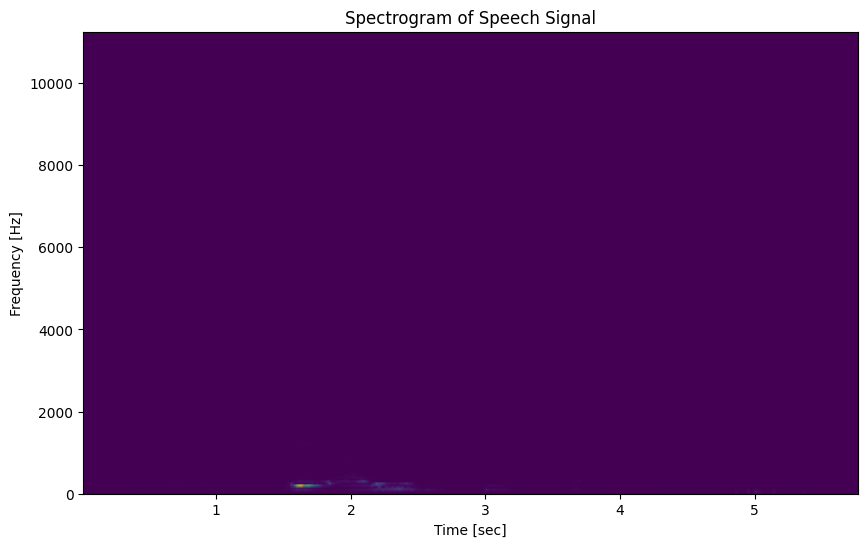

In [8]:
# A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal
f, t, Sxx = signal.spectrogram(speech_signal, fs=sample_rate, nperseg=window_size, noverlap=window_size // 2)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.show()